In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/17_case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012.csv")

In [3]:
df.shape

(4344, 11)

In [4]:
df.head()

,state_ut,year,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,Andhra Pradesh,2001,RESIDENTIAL PREMISES,100,4446961,177,5962460,5158,105324332,4257,53517835
1,Andhra Pradesh,2001,HIGH-WAY,57,5340335,172,6364866,31,2000574,74,1593092
2,Andhra Pradesh,2001,RIVER & SEA,2,145345,11,209330,101,1412516,110,1610200
3,Andhra Pradesh,2001,RAILWAYS,8,1750800,19,304336,6,24392,943,16418110
4,Andhra Pradesh,2001,RUNNING TRAINS,5,75000,3,164000,0,0,296,6170175


In [5]:
highway_dacoits = df.loc[df['Place Of Occurrence'] == 'HIGH-WAY', :]

In [6]:
highway_dacoits.year.value_counts()

2012    35
2011    35
2010    35
2009    35
2008    35
2007    35
2006    35
2005    35
2004    35
2003    35
2002    35
2001    35
Name: year, dtype: int64

In [7]:
year_state = highway_dacoits.groupby(['year', 'state_ut'])

In [8]:
year_state.sum().reset_index().head()

,year,state_ut,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,2001,A&N Islands,0,0,0,0,0,0,0,0
1,2001,Andhra Pradesh,57,5340335,172,6364866,31,2000574,74,1593092
2,2001,Arunachal Pradesh,0,0,0,0,0,0,8,575000
3,2001,Assam,46,2023060,136,2968810,7,198947,87,1204993
4,2001,Bihar,162,10246946,826,21645043,0,0,257,11682986


In [9]:
tn_hw_dacoits = highway_dacoits.loc[highway_dacoits.state_ut == 'Tamil Nadu',
                                    [
        'year',
        'Dacoity (Section 395-398 IPC) - Number of cases registered',
        'Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees)'
    ]
]

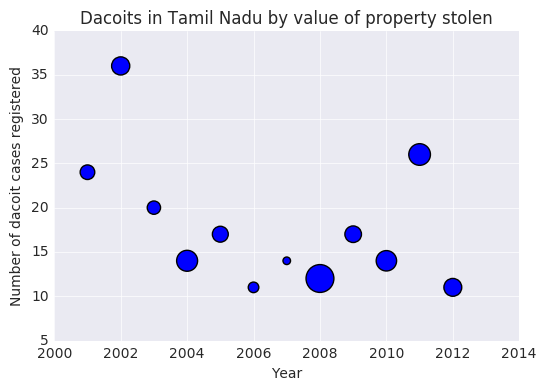

In [10]:
size_range = tn_hw_dacoits[[2]].apply(lambda x: x / 100000)
sns.set_style('darkgrid')
mplt.scatter(tn_hw_dacoits.year, tn_hw_dacoits[[1]], s=size_range)
mplt.title('Dacoits in Tamil Nadu by value of property stolen')
mplt.ylabel('Number of dacoit cases registered')
mplt.xlabel('Year')